In [128]:
import glob
import numpy as np
import pandas as pd
from matplotlib.pyplot import imshow
from scipy.misc import imread
from PIL import Image, ImageDraw, ImageFont
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
from matplotlib.cbook import get_sample_data
from matplotlib.offsetbox import OffsetImage, AnnotationBbox


font_dir = glob.glob("/Library/Fonts/*")
imgs_arr = glob.glob("./imgs/*")

In [ ]:
def generate_images():
    for i, font in enumerate(font_dir):
        name = font[15:].strip(".ttf").strip(".otf")
        img = Image.new('RGB', (110, 35), color = (255, 255, 255))
        try:
            fnt = ImageFont.truetype(font, 15)
        except IOError:
            continue
        d = ImageDraw.Draw(img)

        d.text((10, 10), "honeygloves", font = fnt, fill= (0, 0, 0))

        img.save('imgs/%s.png' % name)

In [32]:
def vectorize(dir="./imgs"):
    images = glob.glob("./imgs/*")
    flat_imgs = [np.array(imread(img, flatten=True)).flatten() for img in images]
    return {k:v for k,v in zip(images, flat_imgs)}

316

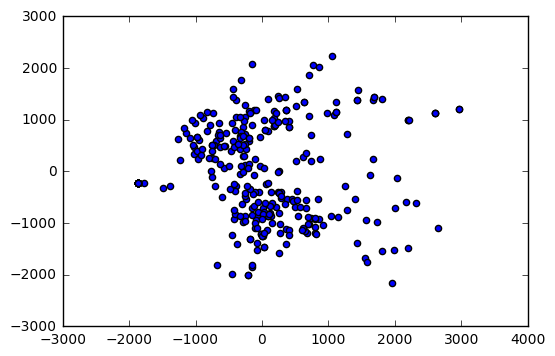

In [117]:
mapping = vectorize()
X = mapping.values()

pca = PCA(n_components=3)
X_r = pca.fit(X).transform(X)

plt.figure()
x = map(lambda x: x[0], X_r)
y = map(lambda z: z[1], X_r)
z = map(lambda zz: zz[2], X_r)
plt.scatter(x, y)

plt.show()



In [131]:
df = pd.DataFrame({'x': x, 'y': y, 'z': z})
df.head()
df.to_csv("datapoints.csv", index=False)

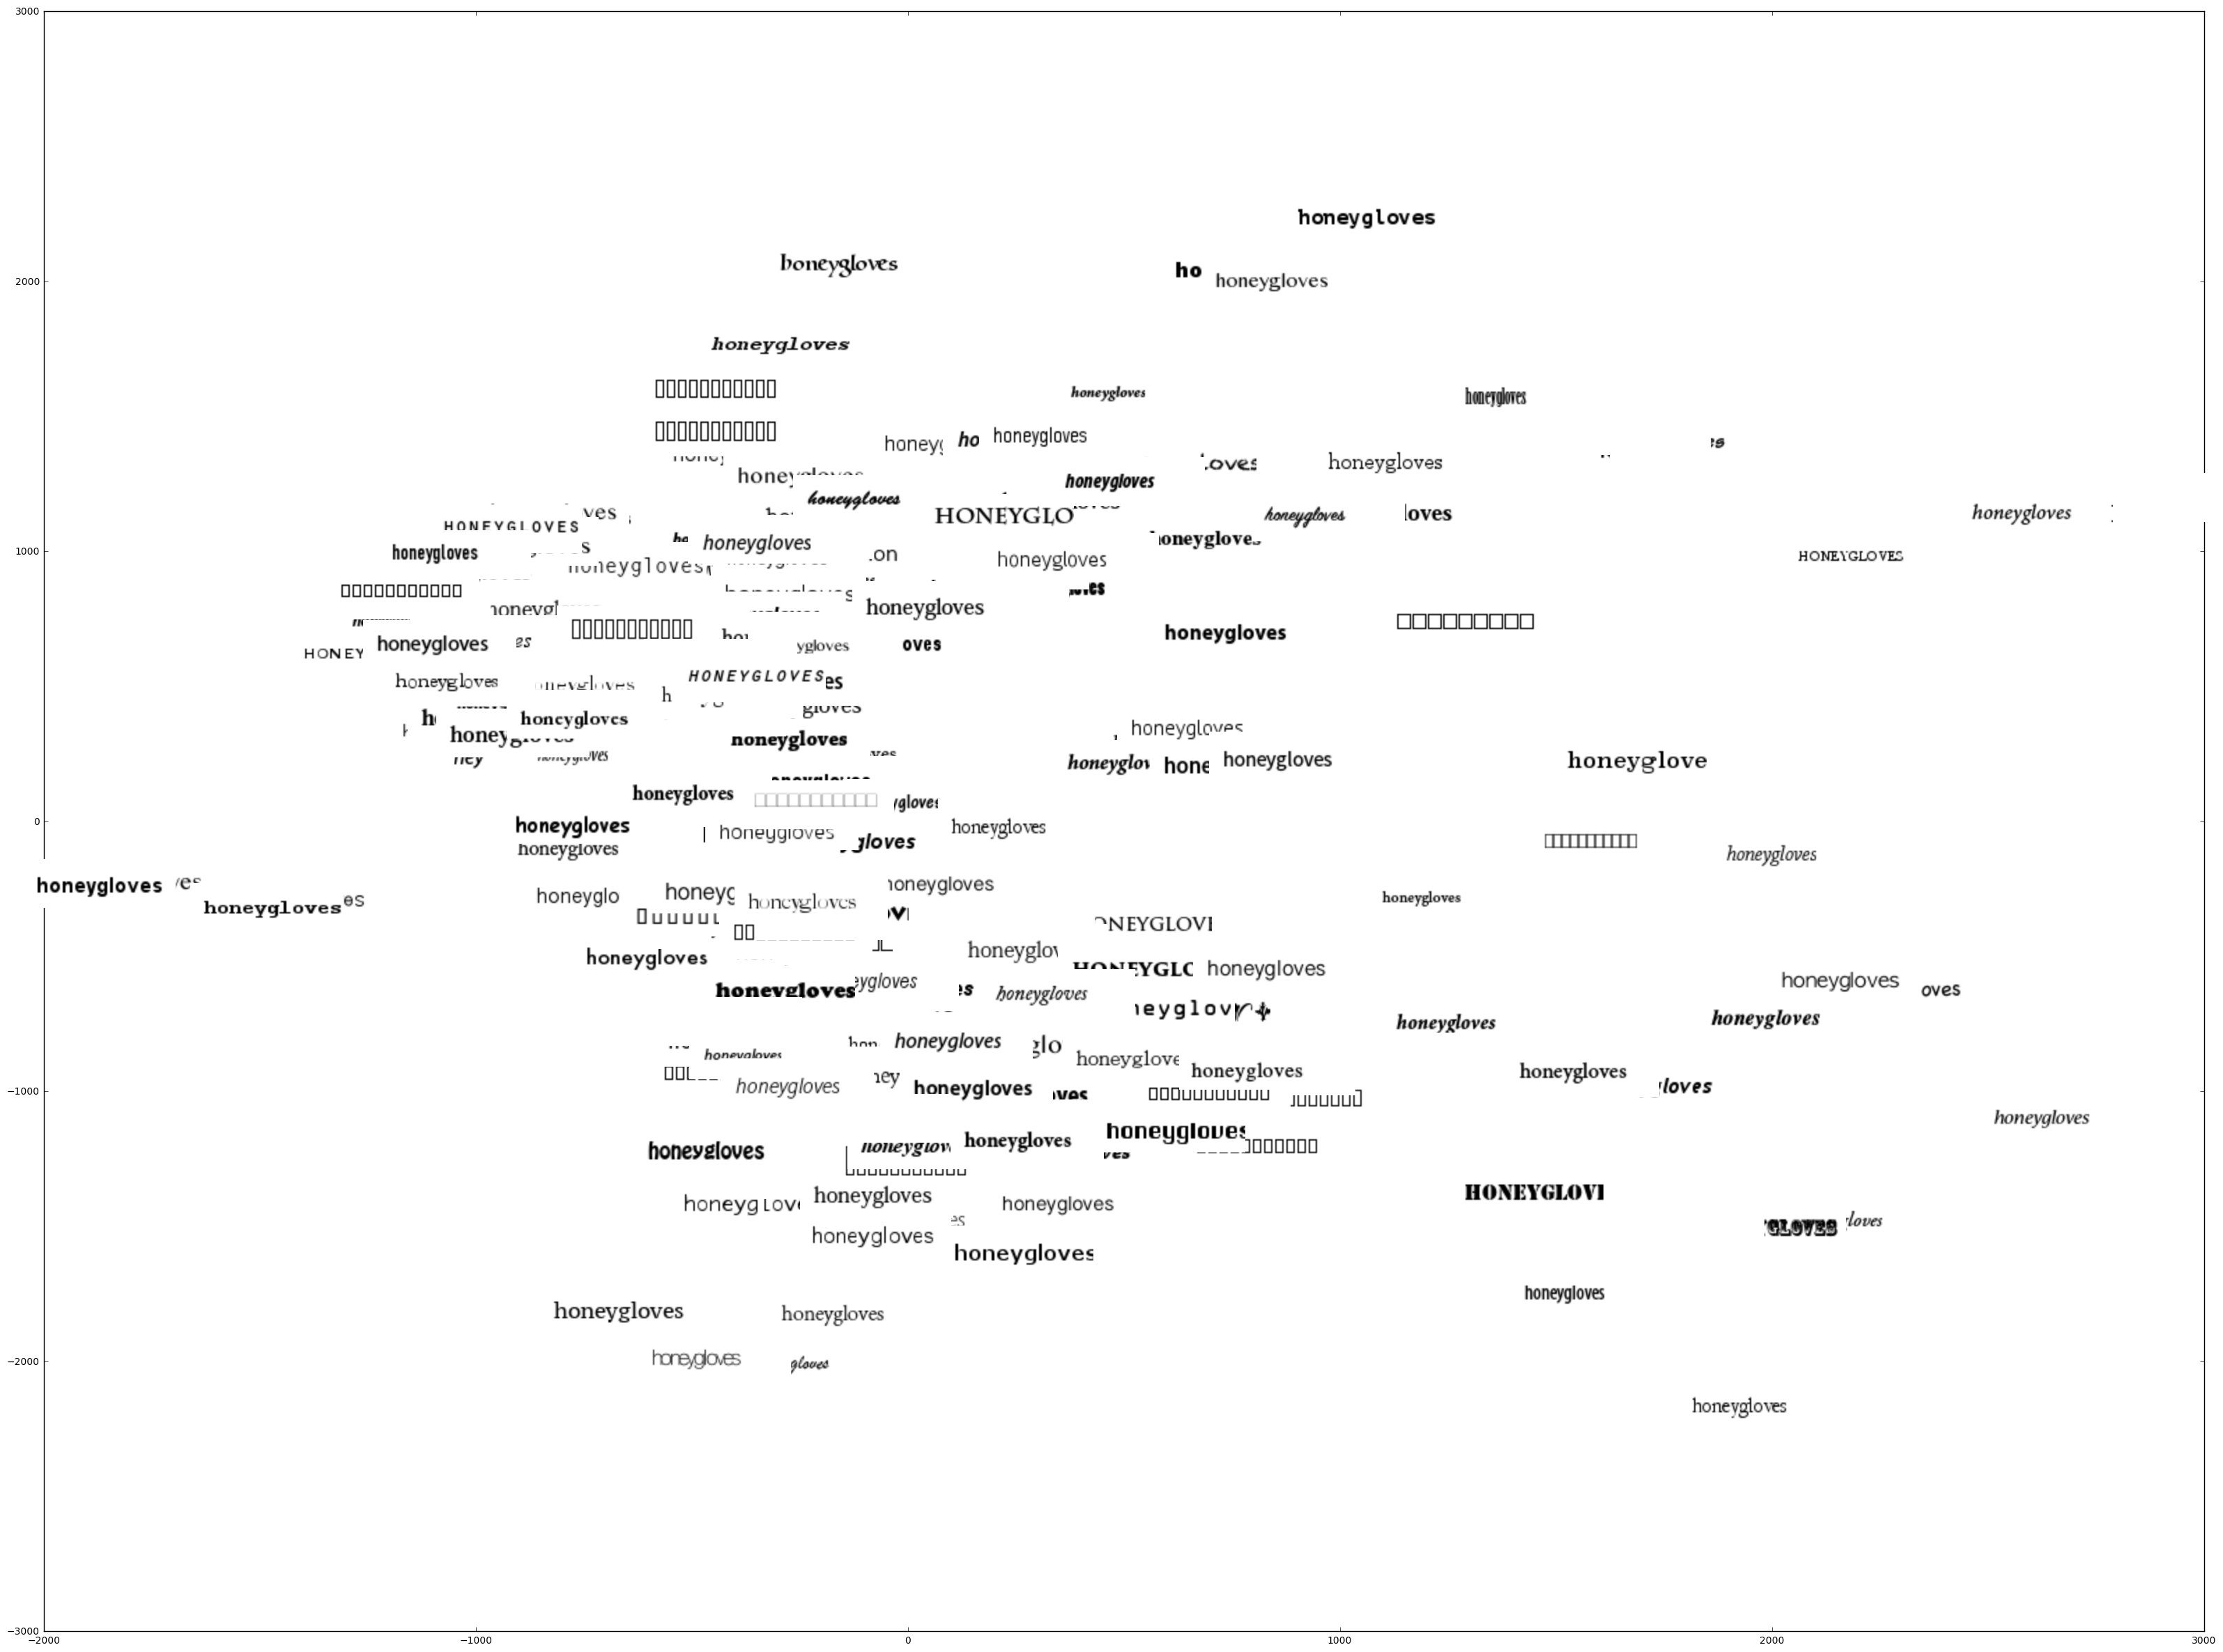

In [126]:
def main():
    fig, ax = plt.subplots(figsize=(40, 30))
    for xx, yy, img in zip(x, y, imgs_arr):
        imscatter(xx, yy, img, zoom=2, ax=ax)
        ax.plot(xx, yy)
    plt.show()

def imscatter(x, y, image, ax=None, zoom=1):
    if ax is None:
        ax = plt.gca()
    try:
        image = plt.imread(image)
    except TypeError:
        # Likely already an array...
        pass
    im = OffsetImage(image, zoom=zoom)
    x, y = np.atleast_1d(x, y)
    artists = []
    for x0, y0 in zip(x, y):
        ab = AnnotationBbox(im, (x0, y0), xycoords='data', frameon=False)
        artists.append(ax.add_artist(ab))
    ax.update_datalim(np.column_stack([x, y]))
    ax.autoscale()
    return artists

main()